# Thyroid Disease Detection

##### Life cycle of Thyroid disease Detector
- Understanding the problem statement
- Data Collection
- Data Checks to perform
- Exploratory Data Analysis
- Data preprocessing
- Model Training
- Choose best model

## 1) Problem Statement

- Thyroid disease is a common cause of medical diagnosis and prediction, with an onset that is difficult to forecast in medical research. The thyroid gland is one of our body's most vital organs. Thyroid hormone releases are responsible for metabolic regulation. Hyperthyroidism and hypothyroidism are one of the two common diseases of the thyroid that releases thyroid hormones in regulating the rate of body's metabolism.The main goal is to predict the estimated risk on a patient's chance of obtaining thyroid disease or not.


## 2) Data Collection
- Dataset Source - https://archive.ics.uci.edu/dataset/102/thyroid+disease
- From Garavan Institute
- Documentation: as given by Ross Quinlan
- 6 databases from the Garavan Institute in Sydney, Australia
- Approximately the following for each database:

    ** 2800 training (data) instances and 972 test instances
    ** Plenty of missing data
    ** 29 or so attributes, either Boolean or continuously-valued 

- 2 additional databases, also from Ross Quinlan, are also here

    ** Hypothyroid.data and sick-euthyroid.data
    ** Quinlan believes that these databases have been corrupted
    ** Their format is highly similar to the other databases 

- A Thyroid database suited for training ANNs

    ** 3 classes
    ** 3772 training instances, 3428 testing instances
    ** Includes cost data (donated by Peter Turney) 

### 2.1 Import Required Packages
#### Importing Pandas, Numpy, Matplotlib, Seaborn, regular expression and Os Libraries

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import os
import re

### Setting DataFrame max Rows and Columns view
- Maximum columns: 5000
- Maximum rows: All

In [72]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',10000)

In [73]:
final_dataset=pd.read_csv('blended_data.csv')

In [74]:
final_dataset.shape

(7544, 31)

In [75]:
final_dataset['disease'].value_counts()

disease
negative                   7151
compensated hypothyroid     194
primary hypothyroid          95
hyperthyroid                 79
goitre                       12
T3 toxic                     10
secondary hypothyroid         2
secondary toxic               1
Name: count, dtype: int64

In [76]:
train, test =train_test_split(final_dataset,test_size=0.2)

In [77]:
train.shape, test.shape

((6035, 31), (1509, 31))

# Feature Engineering

## Dropping duplicate records

In [78]:
train.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)

In [79]:
train.shape, test.shape

((6035, 31), (1509, 31))

## 1) Imputation of Missing values

### 1.1 Imputing numerical features

- All the values missing in numerical features like 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG' are treated as report not ready which is represented by 0 value according to the database theory.
- Hence we will impute missing feature with 0, except 'age' feature

In [80]:
def drop_feature_columns(df,colList):
    return df.drop(colList,axis=1)

In [81]:
train.columns

Index(['Unnamed: 0', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'disease'],
      dtype='object')

In [82]:
train=drop_feature_columns(train,['TBG','TSH','Unnamed: 0'])
test=drop_feature_columns(test,['TBG','TSH','Unnamed: 0'])

In [83]:
def get_num_features(df):
    num_features=[features for features in df.columns if df[features].dtypes=='float64']
    return num_features

In [84]:
num_features=get_num_features(train)


#### 1.1.1 Imputing age numerical feature

- Imputing age feature using knn imputer which will calculate the mean value of k closest neighbors mean value


#### 1.1.1.1 Importing KNN imputer library

In [85]:
from sklearn.impute import KNNImputer

#### 1.1.1.2 Creating instance of KNNImputer and fit the numerical features

In [86]:
def num_impute(num_features,df):
    knn_imp=KNNImputer()
    imp_val=knn_imp.fit_transform(df[num_features])
    return imp_val

#### 1.1.1.3 Assigning the missing values to the numeric feature

In [87]:
train[num_features]=num_impute(num_features,train)

### 1.2 Imputing categorical features

#### 1.2.1 Assigning the missing values with most frequent category

In [88]:
def get_cat_features(df):
    cat_features=[features for features in df.columns if df[features].dtypes=='object']
    return cat_features

In [89]:
cat_features=get_cat_features(train)

In [90]:
cat_features

['sex', 'referral_source', 'disease']

In [91]:
def cat_impute(colList,df):
    for features in colList:
        df[features]=np.where(df[features].isnull(),df[features].mode(),df[features])
    return df

In [92]:
train=cat_impute(cat_features,train)
test=cat_impute(cat_features,test)

### 1.3 Imputing boolean features

In [93]:
def get_bool_features(df):
    bool_features=[features for features in df.columns if df[features].dtypes=='int64']
    return df

In [94]:
bool_features=get_bool_features(train)

In [95]:
def bool_impute(df,colList):
    for features in colList:
        df[features]=np.where(df[features].isnull(), 0, df[features])
    return df

In [96]:
train=bool_impute(train,bool_features)
test=bool_impute(test,bool_features)

- Checking the null values in dataset

In [97]:
train.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
referral_source              0
disease                      0
dtype: int64

## 2) Performing encoding on boolean features

### 2.2 Performing encoding on categorical features

- Below code will be used to assign a numeric digit to each unique value in each feature of categorical feature

In [98]:
def cat_encoding(df,colList, target_feature):
    for features in colList:
        if features!=target_feature:
            cat_encode={val:idx for idx,val in enumerate(df[features].value_counts().index,start=1)}
            print(cat_encode)
            df[features]=df[features].map(cat_encode)
    return df

In [99]:
train=cat_encoding(train,cat_features,'disease')
test=cat_encoding(test,cat_features,'disease')

{'F': 1, 'M': 2}
{'other': 1, 'SVI': 2, 'SVHC': 3, 'STMW': 4, 'SVHD': 5}
{'F': 1, 'M': 2}
{'other': 1, 'SVI': 2, 'SVHC': 3, 'STMW': 4, 'SVHD': 5}


## 3) Handling Rare Classes in disease feature and also classes related to another one

### 3.1 Checking the frequency of each class in disease feature

In [100]:
train['disease'].value_counts()

disease
negative                   5718
compensated hypothyroid     156
primary hypothyroid          78
hyperthyroid                 62
T3 toxic                      9
goitre                        9
secondary hypothyroid         2
secondary toxic               1
Name: count, dtype: int64

- primary hypothyroid (297) ---> primary hypothyroid concurrent non-thyroidal illness (6) = 303
- underreplaced (111) --> underreplacement (35) + underreplaced increased binding protein (2) = 148
- overreplaced (110) --> overreplacement (23) + replacement therapy (29) + consistent with replacement therapy decreased binding protein (1) = 163
- increased binding protein (470) ---> antithyroid drugs increased binding protein (1) + antithyroid drugs (14) + compensated hypothyroid increased binding protein (10)= 485
- secondary toxic (8) ---> secondary toxic  | discordant assay results (1) = 9
- discordant assay results (196) ---> secondary toxic  | discordant assay results (1) + discordant (45) = 242
- decreased binding protein (39) ---> compensated hypothyroid concurrent non-thyroidal illness decreased binding protein (1) = 40

### 3.2 Creating dictionary to map extra classes with their relative classes

In [101]:
disease_features={'hyperthyroid':['hyperthyroid', 'T3 toxic', 'toxic goitre', 'secondary toxic', 'goitre'],
                 'hypothyroid':['hypothyroid', 'primary hypothyroid','compensated hypothyroid','secondary hypothyroid'],
                 'antithyroid treatment':['antithyroid drugs','I131 treatment','surgery'],
                  'replacement therapy': ['consistent with replacement therapy', 'underreplacement', 'overreplacement'],
                  'discordant assay results':['discordant'],
                  'binding protein': ['increased binding protein', 'decreased binding protein'],
                  'miscellaneous': ['discordant assay results'],
                  'negative': ['concurrent non-thyroidal illness']
                  
                 }

### 3.3 Mapping extra classes with their relative classes

In [102]:
def merge_value(df, mapping_dict):
    for lists in mapping_dict.values():
        for values in lists:
            df['disease']=np.where(df['disease']==values,list(mapping_dict.keys())[list(mapping_dict.values()).index(lists)],df['disease'])
    return df

In [103]:
train=merge_value(train,disease_features)
test=merge_value(test,disease_features)

### 3.4 Checking frequency of each class after mapping

In [104]:
train['disease'].value_counts()

disease
negative        5718
hypothyroid      236
hyperthyroid      81
Name: count, dtype: int64

### Dropping Unwanted features

In [105]:
measured_bool_features=[features for features in final_dataset.columns if '_measured' in features]
measured_bool_features

['TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [106]:
# final_dataset.drop(measured_bool_features+['referral_source'], axis=1, inplace=True)
train=drop_feature_columns(train,measured_bool_features)
test=drop_feature_columns(test,measured_bool_features)

### Encoding the disease categories

In [107]:
def encode_target_feature(df,target_feature_name):
    df[target_feature_name]=np.where(df[target_feature_name]=='negative', 0,1)
    return df

In [108]:
train=encode_target_feature(train,'disease')
test=encode_target_feature(test,'disease')

- All outliers may also useful in detection of disease category hence outlier removal is not necessary

In [109]:
train['disease'].value_counts()

disease
0    5718
1     317
Name: count, dtype: int64

<Axes: xlabel='disease', ylabel='count'>

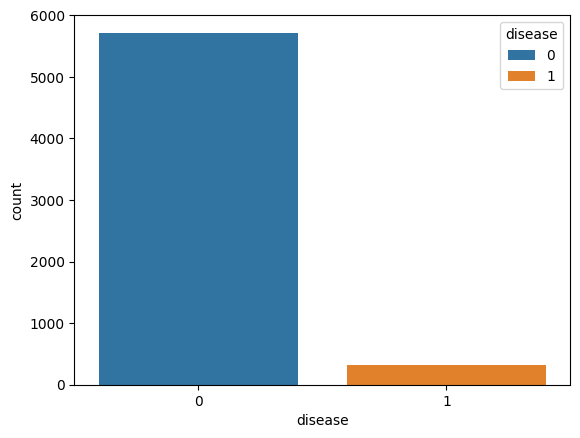

In [110]:
sns.countplot(data=train,x=train['disease'],hue='disease')

## 4) Handling imbalanced dataset

- Due to very high frequency of negative class in disease feature the data gets highly imbalanced.
- Now this highly imbalanced data may reduce the precision and recall value of all classes other than negative class.
- So, to avoid this we might have to balance the frequency of other classes also

### 4.1 Importing the library to oversample the Data
- smote library
- counter library

In [111]:
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [112]:
def oversample_data(df, target_feature_name):
    smote=SMOTE(sampling_strategy='not majority',k_neighbors=4)
    smote=SMOTETomek(sampling_strategy='not minority', random_state=0,smote=smote)

    ros=RandomOverSampler(sampling_strategy='not majority')
    x,y=smote.fit_resample(df.iloc[:,:-1],df[target_feature_name])
    
    return x,y

In [113]:
print('Original dataset shape %s' % Counter(train['disease']))
# x,y=smote.fit_resample(final_dataset.iloc[:,:-1],final_dataset['disease'])

x,y=oversample_data(train,'disease')

# x,y=us.fit_resample(final_dataset.iloc[:,:-1],final_dataset['disease'])
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 5718, 1: 317})
Resampled dataset shape Counter({0: 5707, 1: 5707})


In [114]:
X=pd.DataFrame(x)
Y=pd.DataFrame(y)

In [115]:
balanced_dataset=pd.concat([X,Y],axis=1)
train=balanced_dataset

In [116]:
X.shape

(11414, 21)

# 5) Feature Selection

In [117]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [118]:
def best_feature(df,target_feature_name):
    best_feature=SelectKBest(mutual_info_classif,k=5)
    best_feature.fit(df.iloc[:,:-1],df[target_feature_name])
    feature_names=df.iloc[:,:-1].columns[best_feature.get_support()]
    return feature_names

In [119]:
feature_names=best_feature(train,'disease')

In [120]:
train_X=train[feature_names]
train_Y=train['disease']

In [121]:
test_X=test[feature_names]
test_Y=test['disease']

In [122]:
train_X.head()

,age,T3,TT4,T4U,FTI
0,24.0,2.70,116.0,0.82,143.0
1,43.0,2.26,160.0,1.03,156.0
2,50.0,0.20,33.0,0.70,47.0
3,60.0,1.92,45.0,0.47,96.0
4,66.0,2.58,95.0,0.99,95.0


In [123]:
test_X.head()

,age,T3,TT4,T4U,FTI
1649,34.0,0.2,5.8,0.00,0.0
1633,34.0,3.9,200.0,1.36,147.0
6851,77.0,2.0,105.0,1.05,100.0
604,27.0,5.3,272.0,0.97,281.0
6752,23.0,2.0,102.0,0.97,106.0


## 6) Data Transformation 

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
def transform(X):
    scale=StandardScaler()
    trans_x=pd.DataFrame(scale.fit_transform(X), columns=X.columns)
    return trans_x

In [126]:
x_train=transform(train_X)

In [127]:
x_test=transform(test_X)

In [128]:
x_train.to_csv('train_data.csv',index=False)
train_Y.to_csv('output_train_data.csv',index=False)

In [129]:
x_test.to_csv('test_data.csv',index=False)
test_Y.to_csv('output_test_data.csv',index=False)

In [130]:
x_train.head()

,age,T3,TT4,T4U,FTI
0,-1.448509,0.630499,0.246507,-1.004965,0.753185
1,-0.448451,0.199630,1.139965,0.188162,1.015693
2,-0.080009,-1.817622,-1.438880,-1.686752,-1.185335
3,0.446337,-0.133314,-1.195210,-2.993510,-0.195882
4,0.762145,0.512990,-0.179916,-0.039100,-0.216075


In [131]:
x_train.columns

Index(['age', 'T3', 'TT4', 'T4U', 'FTI'], dtype='object')

In [132]:
x_train.shape

(11414, 5)